# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Garrick\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


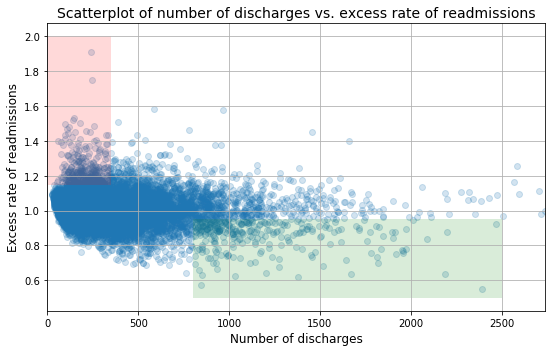

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn

A.  I think the above analysis is a good starting point but not quite robust enough to draw the conclusions and analysis set forth above.  For example,

In Section A of the preliminary report, it states that the rate of readmissions is trending down.  However, it doesn't seem the data has been sufficiently checked if that outlier data is valid or should be discarded.  Furthermore, the scatterplot does not provide a clear trendline or provide any correlation analysis. 

In Section B, the distinction/grouping of hospitals < 100 discharges and hospitals with >1000 discharges seems almost arbitrary.  Also, it may be prudent to normalize/rescale the large hospitals down for a more congruent comparison (especially since the majority of our data points appear to be in the < 1000 discharges range.  It may be better to plot the <100 and >1000 groups separately.


In [6]:
# taking a closer look at the data where excess readmission data exists
clean_hospital_read_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


In [7]:
clean_hospital_read_df.shape

(11578, 12)

In [8]:
clean_hospital_read_df.info()
# Also, there may be other factors which have a profound effect such as state/location
# There is also a column label of "measure name" which suggests varying types of 
# procedures tracked for readmission rates 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [9]:
# checking the types of measures used

np.unique(clean_hospital_read_df['Measure Name'], return_counts=True)

# we find there are 4 different measure types, it may be prudent to group the data accordingly

(array(['READM-30-AMI-HRRP', 'READM-30-COPD-HRRP', 'READM-30-HF-HRRP',
        'READM-30-HIP-KNEE-HRRP', 'READM-30-PN-HRRP'], dtype=object),
 array([1807, 2738, 2841, 1393, 2799], dtype=int64))

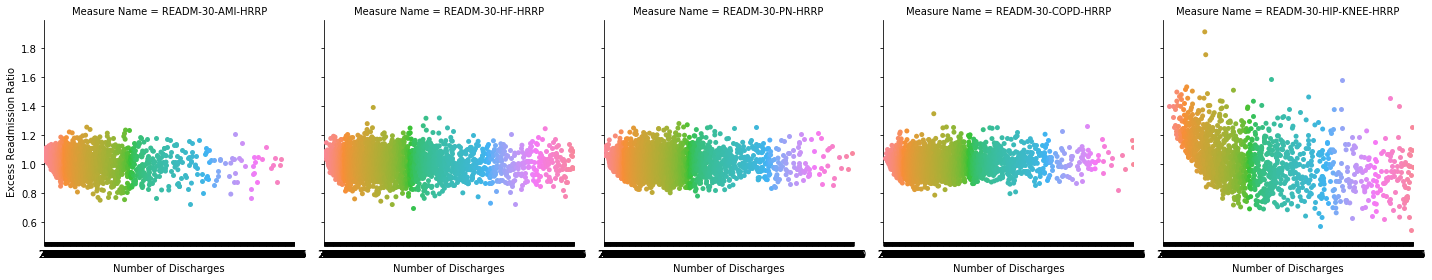

In [10]:
import seaborn as sns

g = sns.factorplot(x='Number of Discharges', y='Excess Readmission Ratio', data=clean_hospital_read_df[81:-3], 
                   col='Measure Name', kind='strip', size=4)
# clean_hospital_read_df[81:-3].groupby('Measure Name').plot(x='Number of Discharges', y='Excess Readmission Ratio', 
#                                                           kind='scatter')
# plt.xlim([0,2700])
#  ['Measure Name'].value_counts()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000200B41E2DD8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000200B2B14EF0>], dtype=object)

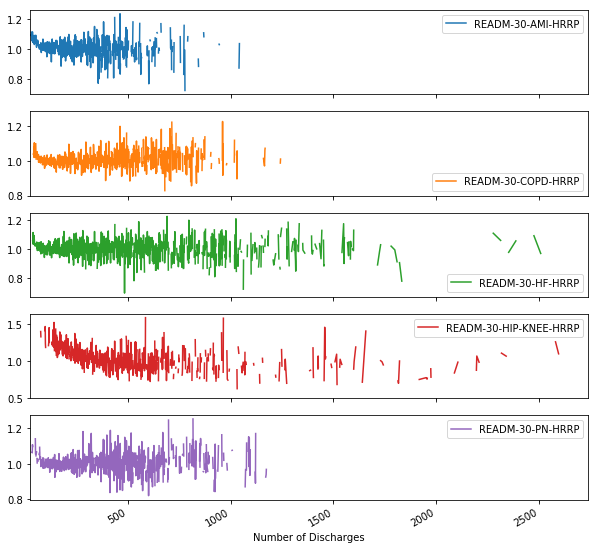

In [11]:
pd.pivot_table(clean_hospital_read_df[81:-3], columns='Measure Name', index='Number of Discharges',
               values='Excess Readmission Ratio').plot(subplots=True, figsize=(10,10))

The above plots seem to suggest that the absolute number of discharges (proxy for the capacity of a hospital) may not be as large of a factor in Excess Readmission Rates but a specific procedure category (Hip/Knee).  The plot with data aggregated by the hip/knee measure produces more a pronounced trend.  It also seems this measure has the data points which, grouped with the other measures, was mistaken interpreted as a trend.  

It does not appear that state has a major effect on Excess Readmission Ratio.

### Part B)

We wish to see if the correlation between the Number of Discharges and Excess Readmission Ratio from Hip/Knee procedures is statistically significant from the correlations from the other procedures.  An appropriate hypothesis test would be have "no difference" as our null hypothesis and "statistically different" as our alternative.

    H0: R(non-Hip/Knee procedures) = R(Hip/Knee Procedures)
    Ha: R(non-Hip/Knee procedures) ≠ R(Hip/Knee Procedures)

In [12]:
# calculate the mean correlation for Heart Failure, Acute Myocardial Infarction, Chronic obstructive pulmonary disease, 
# and Pulmonary procedures

import scipy.stats as stats

df = clean_hospital_read_df[81:-3]

def bs_permutations_r(x,y,n):
    perm_array = np.empty(n)
    for i in range(n):
        perm_y = np.random.permutation(y)
        r, p = stats.pearsonr(x,perm_y)
        perm_array[i] = r
    return perm_array

In [13]:
base_r = stats.pearsonr(df['Number of Discharges'].loc[df['Measure Name'] != 'READM-30-HIP-KNEE-HRRP'],
                            df['Excess Readmission Ratio'].loc[df['Measure Name'] != 'READM-30-HIP-KNEE-HRRP'])

print('Non-Hip/Knee R: {}'.format(base_r[0]))
print('Non-Hip/Knee P-Value: {}'.format(base_r[1]))

Non-Hip/Knee R: -0.008736554113672029
Non-Hip/Knee P-Value: 0.3793974605603224


In [14]:
# with our base case correlation coefficient as -0.008, let us find the coefficient for Hip/Knee subset and permutated

np.random.seed(100)
hip_knee_r = bs_permutations_r(
                            df['Number of Discharges'].loc[df['Measure Name'] == 'READM-30-HIP-KNEE-HRRP'],
                            df['Excess Readmission Ratio'].loc[df['Measure Name'] == 'READM-30-HIP-KNEE-HRRP'],
                            10000)
print('Mean Coefficient of Number of Discharges and Excess Readmission Ratio for Hip/Knee: {}'.format(
                    hip_knee_r.mean()))

Mean Coefficient of Number of Discharges and Excess Readmission Ratio for Hip/Knee: 0.00020759945411377955


In [15]:
p_value = np.sum(hip_knee_r >= base_r[0]) / len(hip_knee_r)
print('Non-Hip/Knee P-Value: {}'.format(p_value))

Non-Hip/Knee P-Value: 0.6284


With a very high p-value, we fail to reject the null hypothesis.  We can conclude that the correlation between Number of Discharges and Excess Readmission ratio for non-Hip/Knee and Hip/Knee measures are very low and similarly correlated. 

Next, I would like to explore if the Excess Readmission ratio varies by state.  

In [16]:
state = clean_hospital_read_df['State']
ratio = clean_hospital_read_df['Excess Readmission Ratio'] #pd.mean auto skips NA's
predict = clean_hospital_read_df['Predicted Readmission Rate']
expect = clean_hospital_read_df['Expected Readmission Rate']

state_df = pd.concat([state,ratio,predict,expect], axis=1)
state_df.columns = ['state', 'excess_ratio','predicted','expected']
state_df = state_df.groupby('state').median().reset_index()
state_df = state_df.sort_values(by='excess_ratio')

state_df.head()

,state,excess_ratio,predicted,expected
13,ID,0.89915,16.05,17.15
41,SD,0.90310,15.30,17.10
26,MT,0.91880,15.30,16.30
44,UT,0.93660,14.70,16.10
28,ND,0.94470,16.00,17.00


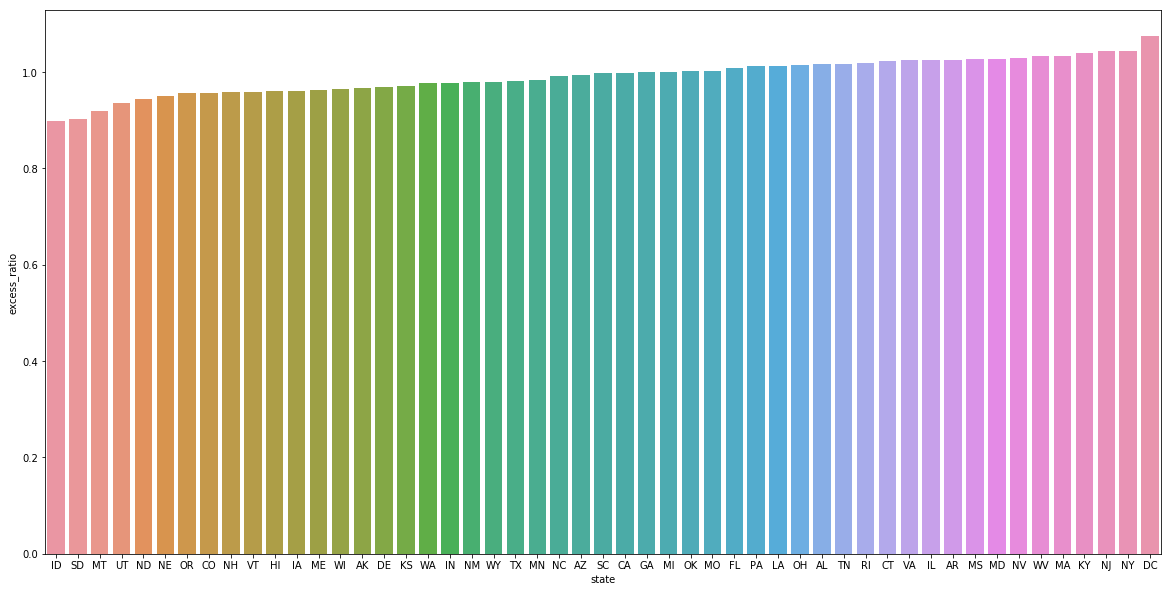

In [17]:
plt.rcParams['figure.figsize']=20,10

sns.barplot('state', 'excess_ratio', data=state_df)

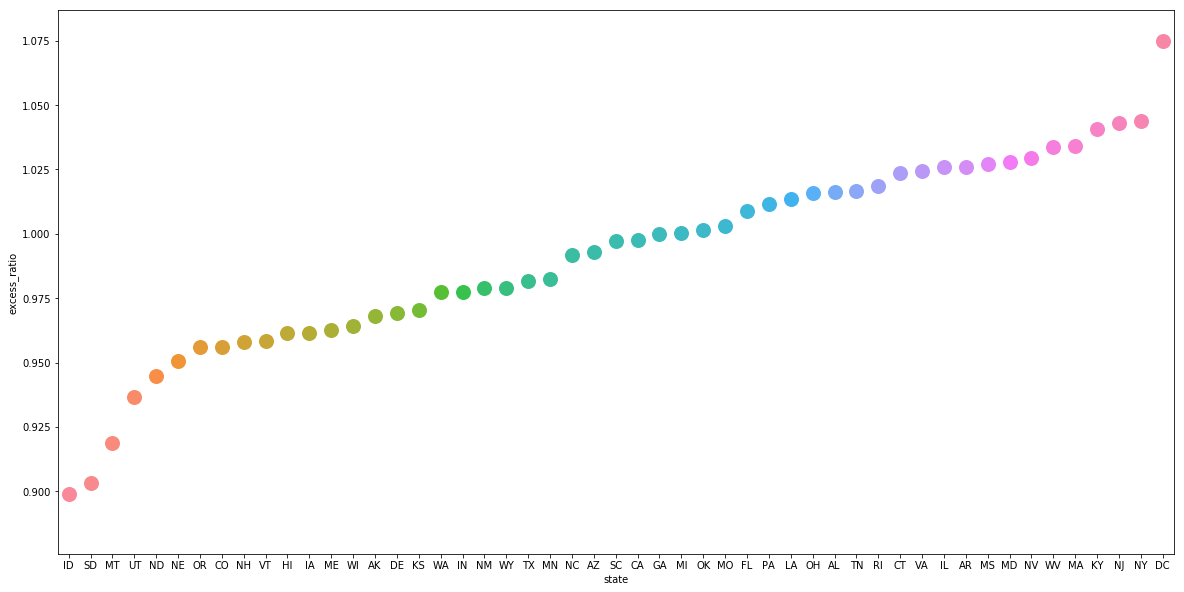

In [18]:
sns.stripplot(x='state', y='excess_ratio', data=state_df, size=15)

The above stripplot illustrates the spectrum of Excess Readmission Ratio by state and we can see a contrast between Idaho (with the lowest ratio) and Washington D.C (with the highest ratio).  Especially since we are looking at a measure that is a ratio, this difference can be quite substantial.  Before diving further into this, could this be due to biases in our the readmission ratio is calculated?

Possible to replot with the measures taken in account?



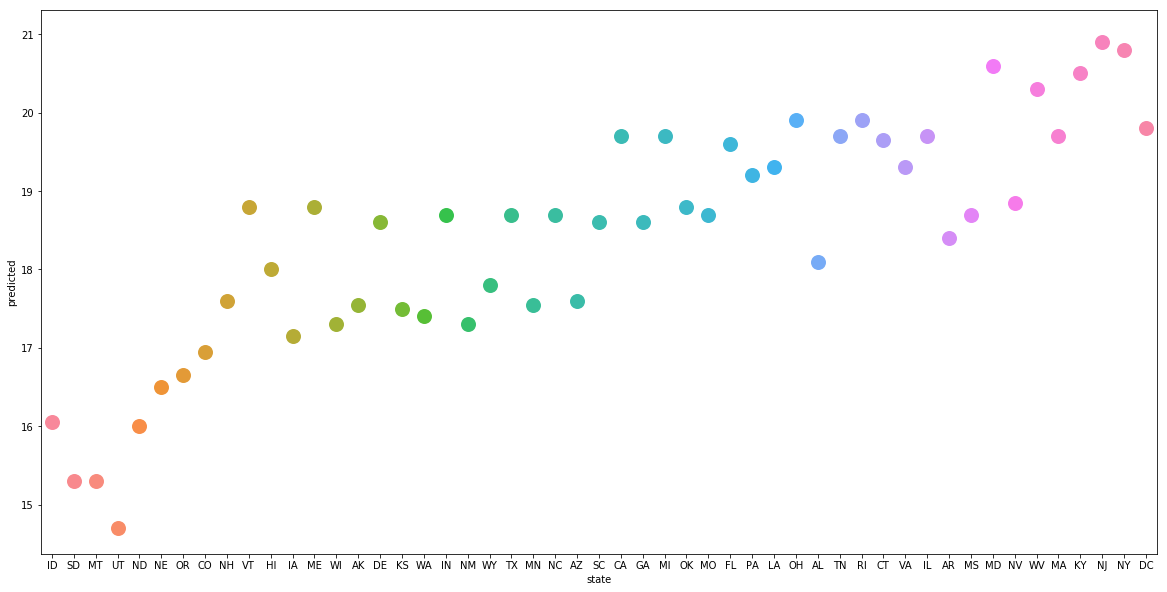

In [19]:
# plotting the predicted rates for any outliers that do not fit the above trend
sns.stripplot(x='state', y='predicted', data=state_df, size=15)

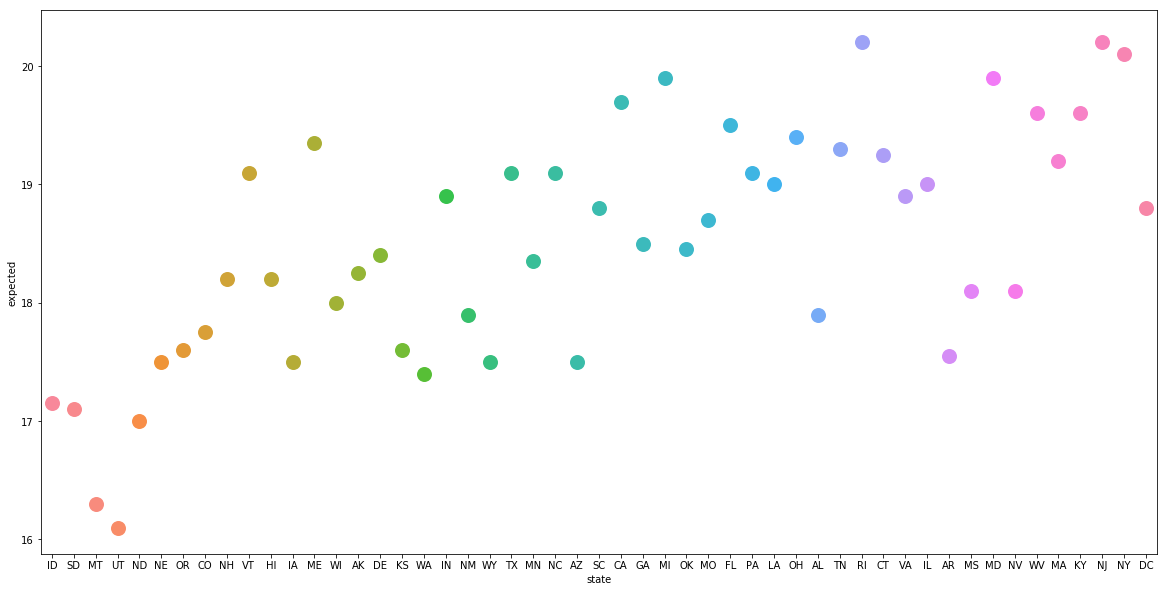

In [20]:
# same for the expected rate
sns.stripplot(x='state', y='expected', data=state_df, size=15)
# there is some higher variability there but broadly follows the trend

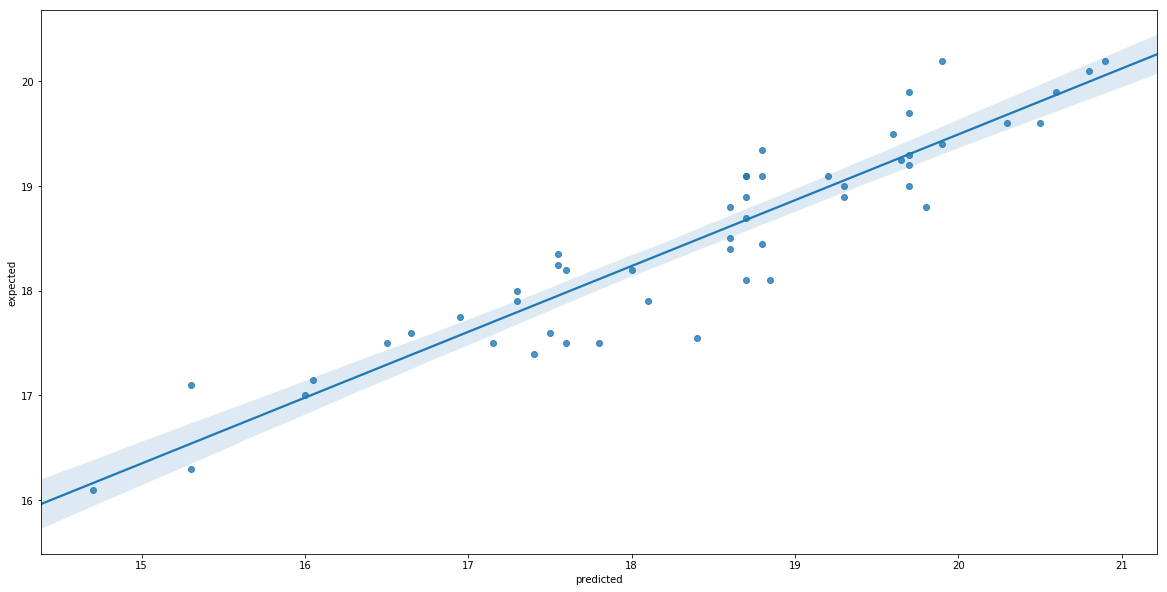

In [21]:
sns.regplot(x="predicted", y="expected", data=state_df)

Given the linear relationship between the "expected" and "predicted" rates, I feel that it is safe to say that the Expected and Predicted rates do not appear to be biased.  That is, DC doesn't have a high readmission ratio because of a substantially low expected rate or substantially high predicted rate.  

We may not proceed operating under the assumption the Excess Readmission Ratio significant varies by state and does not have any inherent biases in their measurement that could account for such differences.  

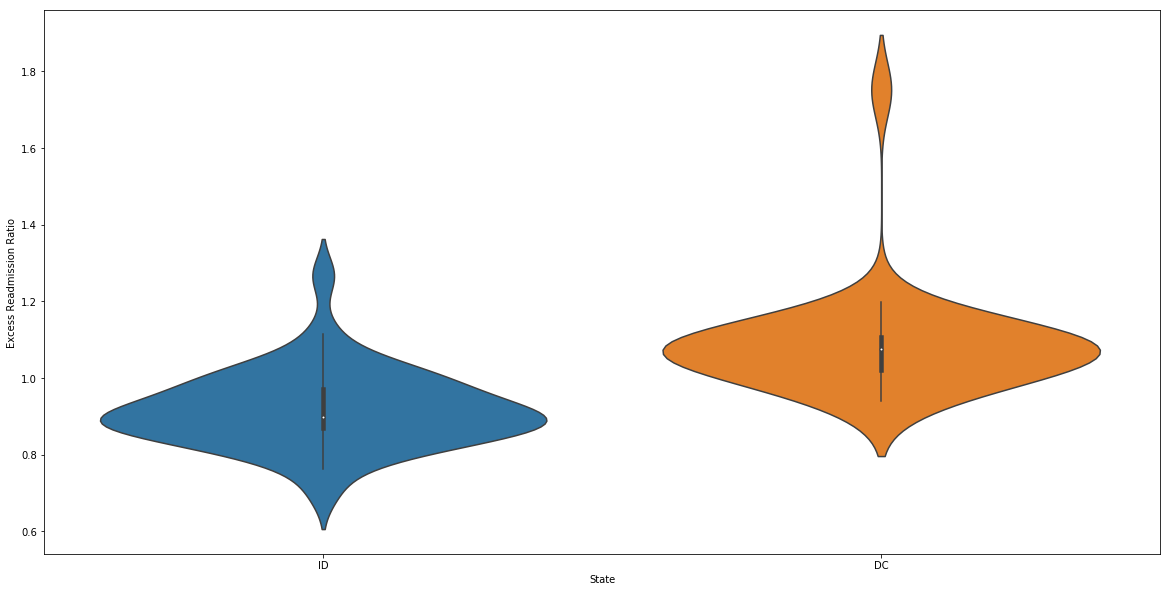

In [76]:
# let us further visualize the difference between Idaho and DC

ID = clean_hospital_read_df.loc[clean_hospital_read_df['State'] =='ID']

DC = clean_hospital_read_df.loc[clean_hospital_read_df['State'] =='DC']

ID_DC = pd.concat([ID, DC], axis=0)

ID_DC = ID_DC[['State','Excess Readmission Ratio','Measure Name','Number of Discharges']] 

sns.violinplot(x='State', y='Excess Readmission Ratio', data=ID_DC)

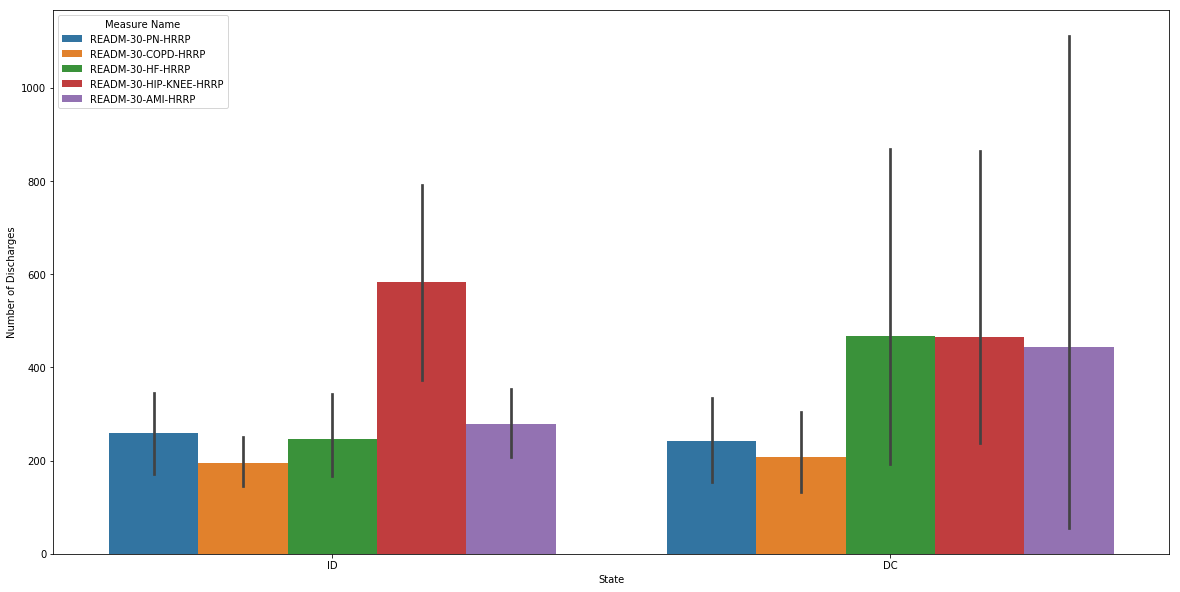

In [77]:
# is there a considerable difference in the number of discharges for Idaho and DC?
sns.barplot(x='State', y='Number of Discharges', data=ID_DC, hue='Measure Name')

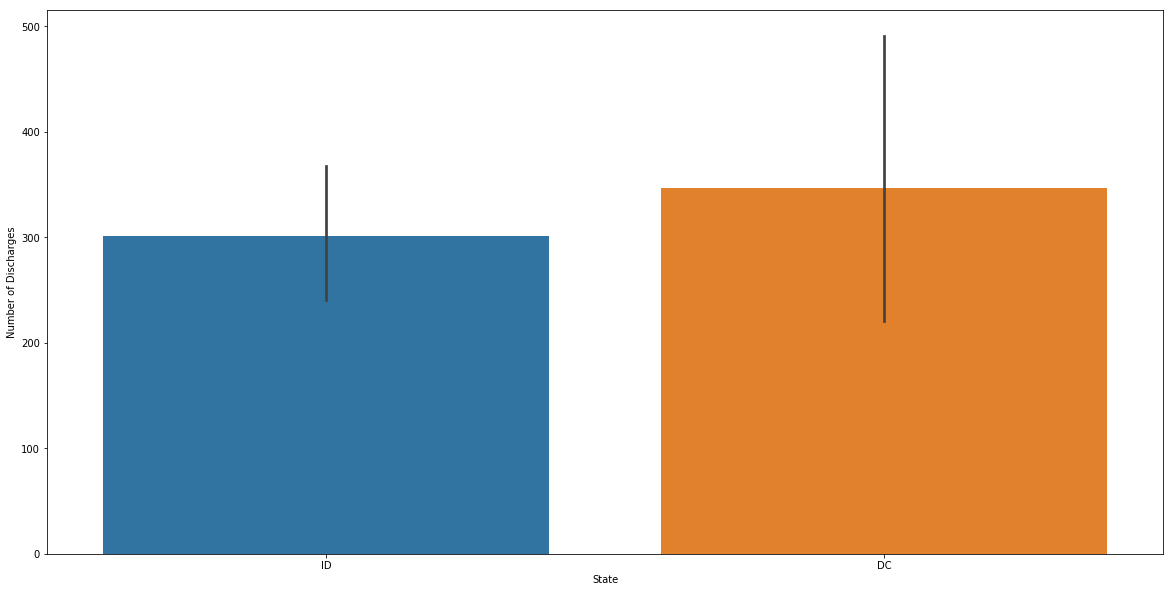

In [78]:
sns.barplot(x='State', y='Number of Discharges', data=ID_DC)

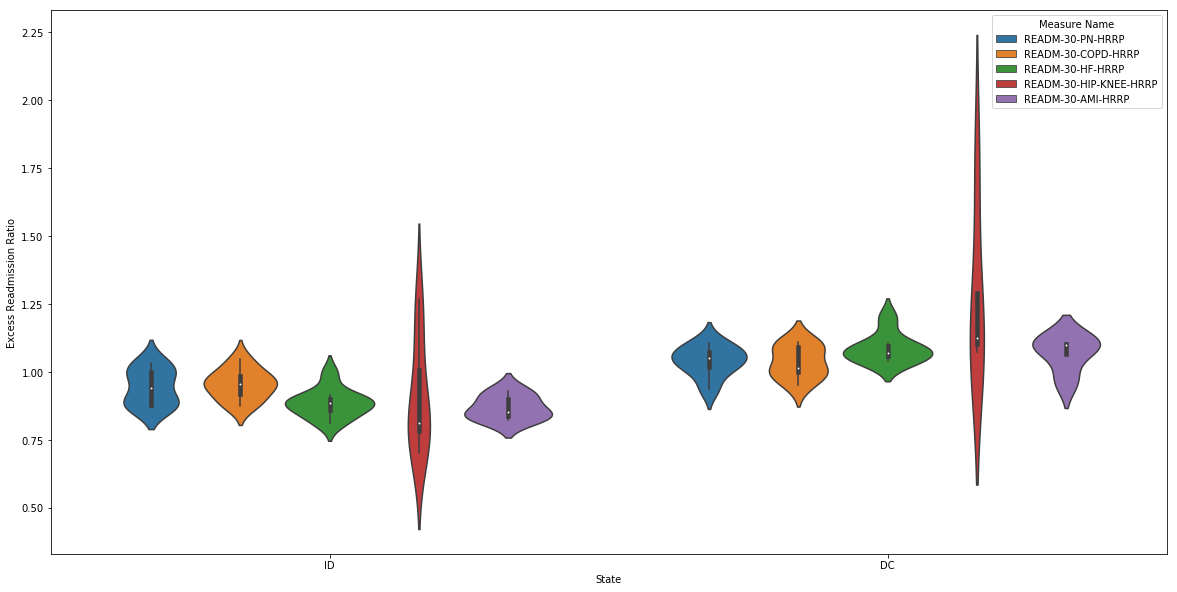

In [55]:
# want to check if the measure has any bearing on the state average
sns.violinplot(x='State', y='Excess Readmission Ratio', data=ID_DC, hue='Measure Name')

# appears that Idaho's Excess Readmission Ratios by procedure are stillmostly lower than DC
# However, DC's readmission rates for Hip/Knee may be what is driving DC's ratio higher
# Lastly, other than Heart Failure, the each State's distribution has a slightly different shape. 

### Part B... Part 2)

For our hypothesis test, we are investigating the Excess Readmission Rates between between two states (our "samples").  Because we are also comparing the means of each sample, we will use a two-sample t-test. Our hypothesis statements as follows:

    *H0: The mean of Idaho's Excess Readmission Ratio = The mean of District of Columbia's Excess Readmission Ratio
    *Ha: The mean of Idaho's Excess Readmission Ratio ≠ The mean of District of Columbia's Excess Readmission Ratio
    
We will test at the 99% confidence level and will reject the null hypothesis if the test statistic is > 3.

In [72]:
ID_samp = ID_DC['Excess Readmission Ratio'].loc[ID_DC['State'] == 'ID']
DC_samp = ID_DC['Excess Readmission Ratio'].loc[ID_DC['State'] == 'DC']
                
# ID_samp_mean = np.mean(ID_samp)
# DC_samp_mean = np.mean(DC_samp)

state_test_stat, state_pval = stats.ttest_ind(a=ID_samp, b=DC_samp, equal_var=False)
print('The T-Statistic is: {}'.format(abs(state_test_stat)))
print('P-Value: {}'.format(state_pval))

The T-Statistic is: 5.5451615486276715
P-Value: 1.2473502245049146e-06


With a test statistic of 5.5 and well out of our bounds of 3 standard deviations, we reject the null hypothesis.

We conclude that Idaho and District of Columbia have the same average number of discharges and can thus rule out the initial analysis that the number of discharges is a primary factor in the Excess Readmission Ratio.  Rather, with similar number of discharges, the difference in Excess Readmission Ratio is the greatest.  Given our conclusion that the Excess Readmission Ratio's between Idaho and DC are stastically different, I am lead to believe that the the Excess Readmission Ratio is dependant on the state.

I would change my recommendation to the client to begin looking at differences in healthcare at the state-level.  Perhaps there is some regulatory differences that are responsible for this significant difference in  performance (maybe less stringent regulations or standards of procedures in DC).  The quality and tenure of staff at the state-level could also be a factor (less experienced surgeons could make more mistakes that lead to readmission). There could also be differences in funding to public health (if DC relies more on publicly run facilities).  